<a href="https://colab.research.google.com/github/yzy1999/music_classification/blob/master/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import Input
from keras import regularizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


(256, 1293)


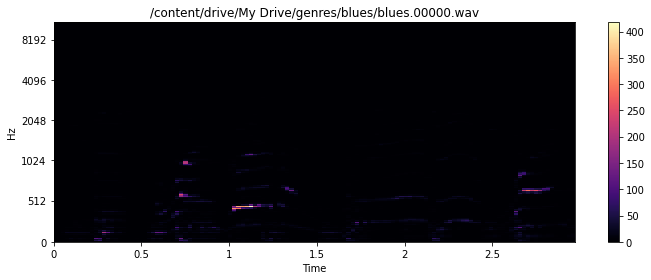

In [ ]:
#display
def display_mel(song):
    y, sr = librosa.load(song)
    mel = librosa.feature.melspectrogram(y,  n_fft=1024,
        hop_length=512, n_mels=256)
    print(mel.shape)
    mel = mel[:,:128]
  #  print(mel.shape)
 #   print(mel)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()
display_mel('/content/drive/My Drive/genres/blues/blues.00000.wav')

In [ ]:
#extract features && generate features
def extract_features_song(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mel = librosa.feature.melspectrogram(y, n_fft=1024,
        hop_length=512, n_mels=256)
   # mel /= np.amax(np.absolute(mel))
   # idx = random.randint(0, 1164)
    mel = mel[:,:1280]
    return mel


def generate_features_and_labels():
    all_features = []
    all_labels = []

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob('/content/drive/My Drive/genres/'+genre+'/*.wav')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song(f)
            all_features.append(features)
            all_labels.append(genre)


    # convert labels to one-hot encoding
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels


In [ ]:
#sound_files = glob.glob('/content/drive/My Drive/genres/blues/*.wav')
#print(sound_files)
features, labels = generate_features_and_labels()
print(np.shape(features))
print(np.shape(labels))


Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...
(1000, 256, 1280)
(1000, 10)


In [ ]:
#divide dataset into test,valid,train
features = features.reshape(1000,327680)
alldata = np.column_stack((features, labels))

np.random.shuffle(alldata[0:100])
np.random.shuffle(alldata[100:200])
np.random.shuffle(alldata[200:300])
np.random.shuffle(alldata[300:400])
np.random.shuffle(alldata[400:500])
np.random.shuffle(alldata[500:600])
np.random.shuffle(alldata[600:700])
np.random.shuffle(alldata[700:800])
np.random.shuffle(alldata[800:900])
np.random.shuffle(alldata[900:1000])

test = np.zeros((100,327690))
valid = np.zeros((100,327690))
train = np.zeros((800,327690))

for k in range(0,10):
    test[10*k : 10*(k+1)] = alldata[100*k:100*k+10]
for m in range(0,10):
    valid[10*m: 10*(m+1)] = alldata[100*m+10: 100*m+20]
for n in range(0,10):
    train[n*80: (n+1)*80] = alldata[100*n+20: 100*(n+1)]

In [ ]:
np.random.shuffle(test)
np.random.shuffle(valid)
np.random.shuffle(train)

#splitidx = int(len(alldata) * training_split)
#train, test = alldata[:splitidx,:], alldata[splitidx:,:]

print(np.shape(train))
print(np.shape(test))
print(np.shape(valid))



(800, 327690)
(100, 327690)
(100, 327690)


In [ ]:

#train_empty = train[:,:-10]
#train_input = np.zeros((3200,256,128,1))
#train_labels = np.zeros((3200,10))
#train_empty = train_empty.reshape(800,256,1280,1)
'''
for i in range(0,800):
    train_input[i*4+0] = train_empty[i,:,0*64:(0+2)*64,:]
    train_labels[i*4+0] = train[i,-10:]
    train_input[i*4+1] = train_empty[i,:,5*64:(5+2)*64,:]
    train_labels[i*4+1] = train[i,-10:]
    train_input[i*4+2] = train_empty[i,:,10*64:(10+2)*64,:]
    train_labels[i*4+2] = train[i,-10:]
    train_input[i*4+3] = train_empty[i,:,15*64:(15+2)*64,:]
    train_labels[i*4+3] = train[i,-10:]
   # train_input[i*19+j] = temp
   # train_labels[i*19+j] = train[i,-10:]
 #       Y_hat = model.predict(temp)
  #      count = count + Y_hat
 #  idx = random.randint(0, 1152)
 #   empty = train_input[i,:,idx:idx+128,:]
   # empty = train_empty[i,:,idx:idx+128,:]
   # print(empty.shape)
'''
#train_input = train[:,:-10]
#train_input = train_input.reshape(800,256,1280,1)
#train_input = np.log10(1 +  abs(train_input))
#train_labels = train[:,-10:]
#train_std = np.std(train_input, ddof=1)
#train_mean = np.mean(train_input)
#train_input = ((train_input - train_mean) / train_std)

test_input = test[:,:-10]
test_input = test_input.reshape(100,256,1280,1)
test_input = np.log(1 +  (test_input))
test_labels = test[:,-10:]

#test_std = np.std(test_input, ddof=1)
#test_mean = np.mean(test_input)
#test_input = ((test_input - test_mean) / test_std)

valid_input = valid[:,:-10]
valid_input = valid_input.reshape(100,256,1280,1)
valid_input = np.log(1 +  (valid_input))
valid_labels = valid[:,-10:]

valid_new = np.zeros((1900,256,128,1))
valid_labels_new = np.zeros((1900,10))
for i in range(0,100):
  for j in range(0,19):
    temp = valid_input[i,:,j*64:(j+2)*64,:]
    temp = temp.reshape(1, 256, 128, 1)
    valid_new[i*19+j] = temp
    valid_labels_new[i*19+j] = valid_labels[i]

#print(np.shape(train_input))
#print(np.shape(train_labels))
print(np.shape(test_input))
print(np.shape(test_labels))
#print(np.shape(valid_input))
#print(np.shape(valid_labels))
#print(train_input[0])
#print(train_labels[1])
#print(train_labels[2])
#print(train_labels[3])
#print(train_labels[0])
print(valid_new.shape)
print(valid_labels_new.shape)


(100, 256, 1280, 1)
(100, 10)
(1900, 256, 128, 1)
(1900, 10)


In [ ]:
for i in range(5):
  print(valid_new[i])
  print(valid_labels_new[i])



In [ ]:
#correspond to net2
input_tensor = Input(shape = (256,128,1))
x1 = layers.Conv2D(256, (256,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.02))(input_tensor)
x2 = layers.Dropout(0.2)(x1)
x3 = layers.Conv2D(256, (1,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.01), padding = 'same')(x2)
x4 = layers.Conv2D(256, (1,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.01), padding = 'same')(x3)
y = layers.add([x2, x3, x4])
y1 = layers.MaxPooling2D((1,125))(y)
y2 = layers.AveragePooling2D((1,125))(y)
concatenated = layers.concatenate([y1, y2], axis = -1)
f1 = layers.Flatten()(concatenated)
d1 = layers.Dense(128, activation = 'relu')(f1)
d2 = layers.Dense(32, activation = 'relu')(d1)
d3 = layers.Dropout(0.1)(d2)
output_tensor = layers.Dense(10, activation = 'softmax')(d3)

model = Model(input_tensor, output_tensor)

model.summary()



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 1, 125, 256)  262400      input_2[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 1, 125, 256)  0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 1, 125, 256)  262400      dropout_3[0][0]                  
____________________________________________________________________________________________

In [ ]:
#correspond to net1
input_tensor = Input(shape = (256,128,1))
x1 = layers.Conv2D(256, (256,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.02))(input_tensor)
x2 = layers.Dropout(0.2)(x1)
x3 = layers.Conv2D(256, (1,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.01), padding = 'same')(x2)
x3_3 = layers.Conv2D(128, (1,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.01), padding = 'same')(x3)
x3_4 = layers.Conv2D(128, (1,4), activation = 'relu', kernel_regularizer = regularizers.l2(0.01), padding = 'same')(x3)
y1 = layers.MaxPooling2D((1,125))(x2)
y2 = layers.AveragePooling2D((1,125))(x3)
y3 = layers.MaxPooling2D((1,125))(x3_3)
y4 = layers.AveragePooling2D((1,125))(x3_4)
concatenated = layers.concatenate([y1, y2, y3, y4], axis = -1)
f1 = layers.Flatten()(concatenated)
d1 = layers.Dense(256, activation = 'relu')(f1)
d2 = layers.Dense(64, activation = 'relu')(d1)
d3 = layers.Dropout(0.1)(d2)
output_tensor = layers.Dense(10, activation = 'softmax')(d3)

model = Model(input_tensor, output_tensor)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 125, 256)  262400      input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1, 125, 256)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1, 125, 256)  262400      dropout_1[0][0]                  
____________________________________________________________________________________________

In [ ]:
def process_x(song):
    song = song.reshape(256,1280,1)
    idx = random.randint(0, 1152)
    empty = song[:,idx:idx+128,:]


    #也可以进行进行一些数据数据增强的处理
    return empty

#train_input = train[:,:-10]
#train_input = train_input.reshape(800,256,1280,1)
#train_input = np.log10(1 +  abs(train_input))
#train_labels = train[:,-10:]


def generate_arrays_from_file():
    #x_y 是我们的训练集包括标签，每一行的第一个是我们的图片路径，后面的是我们的独热化后的标签

    count =1
    batch_size = 50
    while 1:
        batch_x = train[(count - 1) * batch_size:count * batch_size, :-10]
        batch_y = train[(count - 1) * batch_size:count * batch_size, -10:]

        batch_x = np.array([process_x(song) for song in batch_x])
        batch_x = np.log(1 +  (batch_x))

       # batch_y = np.array(batch_y).astype(np.float32)
       # print("count:"+str(count))
        if count<16:
          count += 1
        else:
          count = 1
        yield (batch_x, batch_y)




In [ ]:
from keras.callbacks import Callback

def evaluate(): # 评测函数
  count = np.array([0,0,0,0,0,0,0,0,0,0])
  score = 0
  for i in range(0,100):
    # print("this is i:", i)
      for j in range(0,19):
        temp = valid_new[i*19+j,:,:,:]
        #print(temp.shape)
        temp = temp.reshape(1, 256, 128, 1)
        #print(valid_labels_new[i*19+j])
        Y_hat = model.predict(temp)
        count = count + Y_hat
        #print(i,count)
      if (np.argmax(count) == np.argmax(valid_labels_new[i*19])):
        score += 1
      count = np.array([0,0,0,0,0,0,0,0,0,0])

  return score # 爱算啥就算啥


# 定义Callback器，计算验证集的acc，并保存最优模型
class Evaluate(Callback):

    def __init__(self):
        self.accs = []
        self.highest = 0.

    def on_epoch_end(self, epoch, logs=None):
        acc = evaluate()
        self.accs.append(acc)
        if acc >= self.highest: # 保存最优模型权重
            self.highest = acc
          #  model.save_weights('best_model.weights')

        # 爱运行什么就运行什么
        print('acc: %s, highest: %s' % (acc, self.highest))


evaluator = Evaluate()
#print(valid_new.shape)
#print(valid_new[0*19+0,:,0*64:(0+2)*64,:].shape)



In [ ]:
#train
from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=50)
#model.fit(X, y, validation_split=0.2, callbacks=[early_stopping])
model.compile(optimizer='Adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(train_input, train_labels, epochs=50, batch_size=50,
 #         validation_split=0.1)

'''
history = model.fit(train_input,
                    train_labels,
                    epochs = 50,
                    batch_size = 50,
                    )
'''



model.fit_generator(generate_arrays_from_file(),
          steps_per_epoch=16,
          epochs=500,
          workers=1,
          callbacks=[evaluator],
          validation_data=(valid_new, valid_labels_new)
          )

Epoch 1/500
16/16 [==============================] - 2s 98ms/step - loss: 6.5758 - accuracy: 0.1125 - val_loss: 5.5515 - val_accuracy: 0.1095
acc: 10, highest: 10
Epoch 2/500
16/16 [==============================] - 1s 61ms/step - loss: 4.9191 - accuracy: 0.1838 - val_loss: 4.6311 - val_accuracy: 0.1242
acc: 12, highest: 12
Epoch 3/500
16/16 [==============================] - 1s 59ms/step - loss: 3.9199 - accuracy: 0.2138 - val_loss: 3.6505 - val_accuracy: 0.1805
acc: 17, highest: 17
Epoch 4/500
16/16 [==============================] - 1s 61ms/step - loss: 3.1796 - accuracy: 0.2962 - val_loss: 3.2628 - val_accuracy: 0.1953
acc: 21, highest: 21
Epoch 5/500
16/16 [==============================] - 1s 59ms/step - loss: 2.7188 - accuracy: 0.3562 - val_loss: 3.0496 - val_accuracy: 0.2074
acc: 21, highest: 21
Epoch 6/500
16/16 [==============================] - 1s 58ms/step - loss: 2.3877 - accuracy: 0.3887 - val_loss: 2.4052 - val_accuracy: 0.3147
acc: 33, highest: 33
Epoch 7/500
16/16 [===

In [ ]:
#test on the test dataset
count = np.array([0,0,0,0,0,0,0,0,0,0])
score = 0
for i in range(0,100):
   # print("this is i:", i)
    for j in range(0,19):
      temp = test_input[i,:,j*64:(j+2)*64,:]
      temp = temp.reshape(1, 256, 128, 1)
      Y_hat = model.predict(temp)
      count = count + Y_hat
    if (np.argmax(count) == np.argmax(test_labels[i])):
        score += 1
    count = np.array([0,0,0,0,0,0,0,0,0,0])

print(score)






69
